<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./221_GOME-2_PMAp_load_browse.ipynb"><< 221 - GOME-2 - PMAp - Load and browse</a></span><span style="float:right;"><a href="./241_Sentinel-5P_L2_load_browse.ipynb">241 - Sentinel-5P - Level 2>></a></span>

<div class="alert alert-block alert-success">
<b>20 - DATA DISCOVERY</b></div>

<div class="alert alert-block alert-success">

<b>SEE ALSO</b>

* **30 - CASE STUDIES**
  - [321 - Case study - Siberian fires - Summer 2019](../30_case_studies/321_Siberian_fires_summer_2019_case_study.ipynb)
  - [322 - Case study - Californian fires - Summer 2020](../30_case_studies/322_Californian_fires_summer_2020_case_study.ipynb)
  - [341 - Case study - Ozone hole anomaly - Summer 2019](../30_case_studies/341_Ozone_hole_anomaly_2019_case_study.ipynb)

</div>

<hr>

# 2.3.1 IASI - Level 2 - Load and browse

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/website/home/Satellites/CurrentSatellites/Metop/MetopDesign/IASI/index.html) is an intstrument onboard the Metop-A/B satellites. It provides information on the vertical structure of temperature and humidity as well as main atmospheric species.

IASI data are distributed via:
- the [EUMETSAT data centre (Earth Observation Portal)](https://eoportal.eumetsat.int/userMgmt/register.faces), and
- external services, e.g. [AERIS](https://www.aeris-data.fr/).

IASI Level 2 data are disseminated in `BUFR` originally. AERIS implemented the [IASI portal](https://iasi.aeris-data.fr/), which provides the data in `netCDF` format as well.

#### This module has the following outline:
* [1 - Load and browse IASI Level 2 data](#load)
* [2 - Mask IASI Level 2 data](#masking)
* [3 - Combine Metop-A/B IASI Level 2 data](#combine)

#### Load required libraries

In [1]:
import os
from netCDF4 import Dataset
import xarray as xr

# Python libraries for visualisation
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from IPython.display import display, clear_output

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = FutureWarning)

#### Load helper functions

In [16]:
%run ../functions.ipynb

<hr>

## <a id="load"></a>Load and browse IASI Level 2 products

IASI Level 2 data from the [IASI portal](https://iasi.aeris-data.fr/) are disseminated in the `netCDF` format. You can use the Python library [xarray](http://xarray.pydata.org/en/stable/index.html) to access and manipulate datasets in `netCDF` format.

The following examples shows an example of `Ammonia (NH`<sub>`3`</sub>`) total column` .

### Load netCDF data with `xarray`

`xarray`'s function `open_dataset` enables you to open a `netCDF` file. Once loaded, you can inspect the data structure of the `IASI` data disseminated by the IASI portal.

You see, that the data is a one-dimensional vector with more than 630,000 individual data points. `latitude`, `longitude` and other parameters are stored as individual data variables.

In [6]:
file_name_2a = '../eodata/iasi/nc/2a/2017/09/12/nh3nn_v2_2_20170912_AM.nc'
file_2a = xr.open_dataset(file_name_2a)
file_2a

<xarray.Dataset>
Dimensions:    (time: 632477)
Coordinates:
  * time       (time) float32 1.952e+03 1.952e+03 ... 2.36e+05 2.36e+05
Data variables:
    latitude   (time) float32 ...
    longitude  (time) float32 ...
    column     (time) float32 ...
    error      (time) float32 ...
    CLcov      (time) float32 ...
    VertProf   (time) int32 ...
    angle      (time) float32 ...
Attributes:
    Title:               Ammonia total columns retrieved from IASI measuremen...
    Institution:         Universite Libre de Bruxelles (ULB)/Laboratoire atmo...
    Product_Version:     v2.2
    keywords:            satellite, observation, atmosphere, ammonia
    date_created:        2018-06-13 01:11:30
    contact_emails:      Simon Whitburn (simon.whitburn@ulb.ac.be), Lieven Cl...
    platform:            Metop-A
    spatial_resolution:  12 km diameter pixel at nadir

### Generate a xarray  `DataArray` with latitude and longtiude as coordinates

With the help of the function [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec), you can generate a `xarray.DataArray` object, with `latitude` and `longitude` values as coordinates and the `column` information as data values. This data structure will be helpful for plotting and masking the data.

In [7]:
nh3=file_2a['column']
nh3_da_2a = generate_xr_from_1D_vec(file=file_2a, 
                                    lat_path='latitude', 
                                    lon_path='longitude', 
                                    variable=nh3, 
                                    parameter_name='nh3', 
                                    longname=file_2a.Title,
                                    no_of_dims=1, 
                                    unit='mol/m-2')
nh3_da_2a

<xarray.DataArray 'nh3' (ground_pixel: 632477)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 67.74 67.34 67.18 ... 71.78 71.48 71.36
    longitude  (ground_pixel) float32 -94.98 -95.77 -95.2 ... -96.48 -95.86
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Ammonia total columns retrieved from IASI measurements from t...
    units:      mol/m-2

### Visualize the IASI Level 2 data

The next step is to visualize the generated `xarray.DataArray`. You can re-use the [visualize_scatter](../functions.ipynb#visualize_scatter) function, that plots data points as a scatter plot.

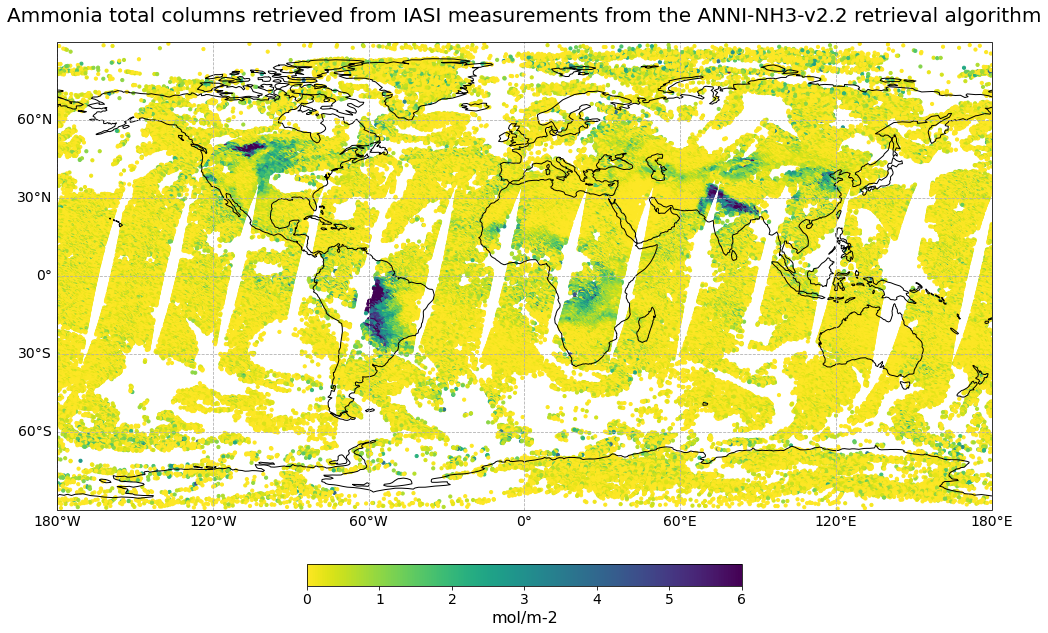

In [9]:
visualize_scatter(xr_dataarray=nh3_da_2a, 
                  conversion_factor=1e-16, 
                  projection=ccrs.PlateCarree(),
                  vmin=0,
                  vmax=6, 
                  point_size=10,
                  color_scale='viridis_r', 
                  unit=nh3_da_2a.units, 
                  title=nh3_da_2a.long_name,
                  set_global=True)

## <a id='masking'></a>Mask IASI Level 2 data products

The IASI Level 2 data files provide you information on the Cloud Cover for each ground pixel. This information is useful to generate a cloud mask and to mask out data points with a cloud cover exceeding a specific threshold.

In order to do so, you have to load the cloud cover information `CLcov` from the data file. You can re-use the [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec) function again.

In [10]:
cloudCov = file_2a['CLcov']
cloudCov

<xarray.DataArray 'CLcov' (time: 632477)>
[632477 values with dtype=float32]
Coordinates:
  * time     (time) float32 1.952e+03 1.952e+03 1.952e+03 ... 2.36e+05 2.36e+05
Attributes:
    long_name:      Cloud coverage in the on ground pixel
    standard_name:  cloud_cover
    units:          %

In [12]:
cloudCov = file_2a['CLcov']
nh3_mask_2a = generate_xr_from_1D_vec(file=file_2a, 
                                      lat_path='latitude', 
                                      lon_path='longitude', 
                                      variable=cloudCov, 
                                      parameter_name=cloudCov.standard_name, 
                                      longname=cloudCov.long_name, 
                                      no_of_dims=1, 
                                      unit=cloudCov.units)
nh3_mask_2a

<xarray.DataArray 'cloud_cover' (ground_pixel: 632477)>
array([21.48, 32.59, 28.97, ..., 88.98, 80.07, 73.65], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 67.74 67.34 67.18 ... 71.78 71.48 71.36
    longitude  (ground_pixel) float32 -94.98 -95.77 -95.2 ... -96.48 -95.86
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud coverage in the on ground pixel
    units:      %

### Mask the `xarray DataArray` with the `generate_masked_array` function

The cloud cover information can now be used to mask the `xarray.DataArray`. You can make use of the function [generate_masked_array](../functions.ipynb#generate_masked_array), where you can set a threshold. All data points with a cloud coverage beyond this threshold are masked out.
Let us mask out all ground pixels with a cloud cover with more than 20%.

You see that the number of data points reduced to just a bit more than 100,000 instead of more than 600,000. With the [visualize_scatter](../functions.ipynb#visualize_scatter) function, you can visualize the masked array.

In [17]:
nh3_2a_masked = generate_masked_array(xarray=nh3_da_2a,
                                      mask=nh3_mask_2a, 
                                      threshold=20, 
                                      operator='<',
                                      drop=True)
nh3_2a_masked

<xarray.DataArray (ground_pixel: 191241)>
array([ 9.8974161e+15,  1.8665552e+16, -6.6255663e+15, ...,
       -7.4887195e+15,  8.4640888e+15,  9.9321484e+15], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 68.43 71.03 71.16 ... 68.11 68.52 68.38
    longitude  (ground_pixel) float32 -99.99 -97.56 -98.13 ... -95.16 -94.52
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Ammonia total columns retrieved from IASI measurements from t...
    units:      mol/m-2

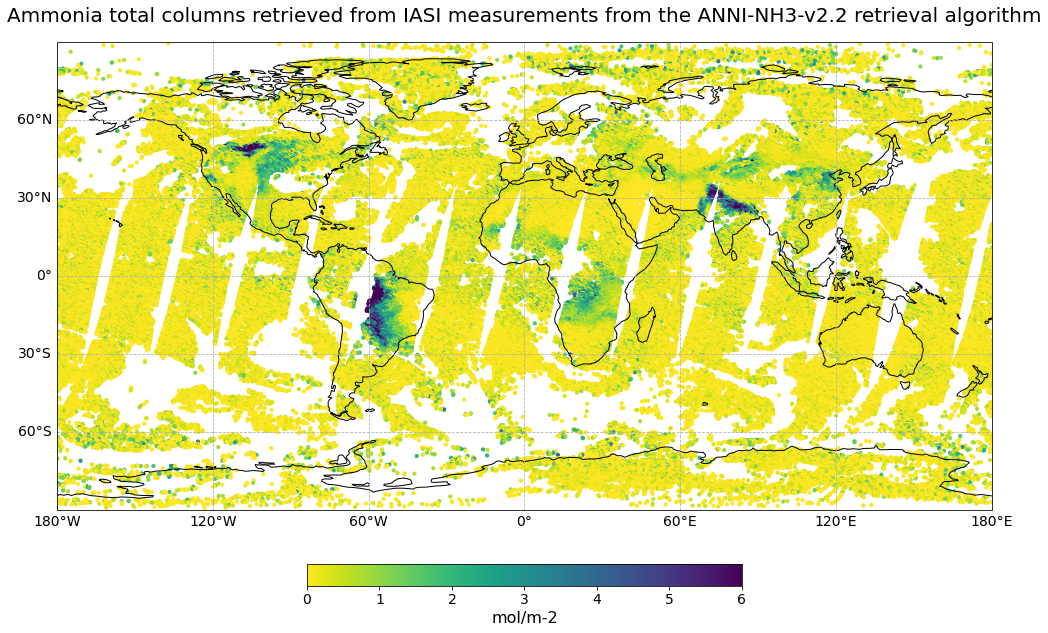

In [19]:
visualize_scatter(xr_dataarray=nh3_2a_masked, 
                  conversion_factor=1e-16, 
                  projection=ccrs.PlateCarree(),
                  vmin=0,
                  vmax=6,
                  point_size=10,
                  color_scale='viridis_r', 
                  unit=nh3_2a_masked.units, 
                  title=nh3_2a_masked.long_name,
                  set_global=True)

<br>

## <a id='combine'></a>Combine Metop A/B IASI Level 2 products

You can combine IASI Level 2 data from both satellites, Metop-A and Metop-B. You have to repeat all the steps you did for IASI Level 2 data from the Metop-A satellite above for the data from the Metop-B satellite.

The steps include:
- [1. Load the Metop-B IASI Level 2 data](#step1)
- [2. Generate a xarray DataArray with latitudes and longitudes as coordinates](#step2)
- [3. Load cloud cover information of the Metop-B IASI Level 2 data](#step3)
- [4. Generate a masked DataArray of the Metop-B IASI Level 2 data](#step4)

### Prepare Metop-B IASI Level 2 data

#### <a id='step1'></a>Load the Metop B IASI Level 2 data

In [21]:
file_name_2b = '../eodata/iasi/nc/2b/2017/09/12/nh3nn_v2_2_20170912_AM.nc'
file_2b = xr.open_dataset(file_name_2b)
file_2b

<xarray.Dataset>
Dimensions:    (time: 652573)
Coordinates:
  * time       (time) float32 0.149 0.149 0.149 ... 2.36e+05 2.36e+05 2.36e+05
Data variables:
    latitude   (time) float32 ...
    longitude  (time) float32 ...
    column     (time) float32 ...
    error      (time) float32 ...
    CLcov      (time) float32 ...
    VertProf   (time) int32 ...
    angle      (time) float32 ...
Attributes:
    Title:               Ammonia total columns retrieved from IASI measuremen...
    Institution:         Universite Libre de Bruxelles (ULB)/Laboratoire atmo...
    Product_Version:     v2.2
    keywords:            satellite, observation, atmosphere, ammonia
    date_created:        2018-06-12 21:40:52
    contact_emails:      Simon Whitburn (simon.whitburn@ulb.ac.be), Lieven Cl...
    platform:            Metop-B
    spatial_resolution:  12 km diameter pixel at nadir

#### <a id='step2'></a>Generate a xarray `DataArray` with latitude and longitude as coordinates

In [23]:
nh3

<xarray.DataArray 'column' (time: 652573)>
[652573 values with dtype=float32]
Coordinates:
  * time     (time) float32 0.149 0.149 0.149 ... 2.36e+05 2.36e+05 2.36e+05
Attributes:
    long_name:      Ammonia total column
    standard_name:  NH3_total_column
    units:          molec.cm^{-2}

In [25]:
nh3=file_2b['column']
nh3_da_2b = generate_xr_from_1D_vec(file=file_2b, 
                                    lat_path='latitude', 
                                    lon_path='longitude', 
                                    variable=nh3, 
                                    parameter_name=nh3.standard_name, 
                                    longname=nh3.long_name, 
                                    no_of_dims=1, 
                                    unit=nh3.units)
nh3_da_2b

<xarray.DataArray 'NH3_total_column' (ground_pixel: 652573)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 9.302 9.103 9.051 ... -62.52 -62.66 -62.49
    longitude  (ground_pixel) float32 138.3 138.3 138.5 ... 112.0 112.5 112.7
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Ammonia total column
    units:      molec.cm^{-2}

#### <a id='step3'></a>Load cloud cover information of the Metop-B IASI Level 2 data

In [27]:
cloudCov = file_2b['CLcov']
nh3_mask_2b = generate_xr_from_1D_vec(file=file_2b, 
                                      lat_path='latitude', 
                                      lon_path='longitude', 
                                      variable=cloudCov, 
                                      parameter_name=cloudCov.standard_name, 
                                      longname=cloudCov.long_name, 
                                      no_of_dims=1, 
                                      unit=cloudCov.units)
nh3_mask_2b

<xarray.DataArray 'cloud_cover' (ground_pixel: 652573)>
array([59.52, 50.45, 47.03, ..., 64.42, 68.59, 62.01], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 9.302 9.103 9.051 ... -62.52 -62.66 -62.49
    longitude  (ground_pixel) float32 138.3 138.3 138.5 ... 112.0 112.5 112.7
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Cloud coverage in the on ground pixel
    units:      %

#### <a id='step4'></a>Generate a masked `DataArray` of the Metop-B IASI Level 2 data

In [28]:
nh3_2b_masked = generate_masked_array(xarray=nh3_da_2b,
                                      mask=nh3_mask_2b, 
                                      threshold=0.2, 
                                      operator='<', 
                                      drop=True)
nh3_2b_masked

<xarray.DataArray (ground_pixel: 153743)>
array([-8.4906172e+15, -8.0999604e+15, -5.2953622e+14, ...,
        2.5474308e+16, -5.3856981e+14, -2.9966416e+15], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 9.401 9.334 10.07 ... -64.07 -62.62 -63.01
    longitude  (ground_pixel) float32 136.6 136.9 134.4 ... 127.3 115.3 113.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Ammonia total column
    units:      molec.cm^{-2}

### Combine both NH<sub>3</sub> data arrays from Metop-A and Metop-B with `xarray.concat`

The last step is to concatenate both masked `DataArrays` from Metop-A and Metop-B into one single `DataArray`. You can use the function `xarray.concat` for it and use the dimension `ground_pixel` as concetanation dimension.

In [29]:
nh3_ab_da = xr.concat([nh3_2a_masked,nh3_2b_masked],dim='ground_pixel')
nh3_ab_da

<xarray.DataArray (ground_pixel: 344984)>
array([ 9.8974161e+15,  1.8665552e+16, -6.6255663e+15, ...,
        2.5474308e+16, -5.3856981e+14, -2.9966416e+15], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 68.43 71.03 71.16 ... -64.07 -62.62 -63.01
    longitude  (ground_pixel) float32 -99.99 -97.56 -98.13 ... 127.3 115.3 113.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Ammonia total columns retrieved from IASI measurements from t...
    units:      mol/m-2

### Visualize the final combined masked IASI data with the `visualize_scatter` function

Now you can visualize the combined and masked `DataArray`. You can re-use the function [visualize_scatter](../functions.ipynb#visualize_scatter) data, which uses matplotlib's `scatterplot` function.

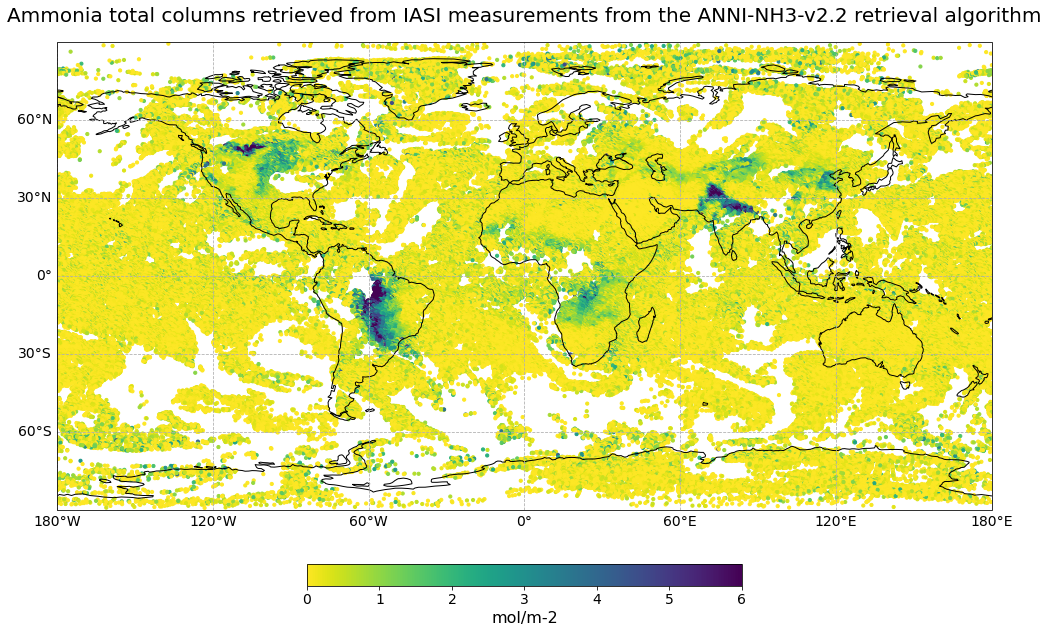

In [31]:
visualize_scatter(xr_dataarray=nh3_ab_da, 
                  conversion_factor=1e-16, 
                  projection=ccrs.PlateCarree(),
                  vmin=0,
                  vmax=6,
                  point_size=10,
                  color_scale='viridis_r', 
                  unit=nh3_ab_da.units, 
                  title=nh3_ab_da.long_name, 
                  set_global=True)

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./221_GOME-2_PMAp_load_browse.ipynb"><< 221 - GOME-2 - PMAp - Load and browse</a></span><span style="float:right;"><a href="./241_Sentinel-5P_L2_load_browse.ipynb">241 - Sentinel-5P - Level 2>></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>